# Apple Stock Price Pridiction

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [8]:
Df = pd.read_csv("./Data/Apple.csv")
Df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,234684800,44.149614,50.996175,-105.071637,-42.411877,19.282236,19.265060,18.372604,18.484713,0.194637,19.979268,0.321428,0.305722,0.316301,bearish
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,392467600,33.094332,43.883529,-152.150999,-124.511983,19.297314,19.267243,18.398896,18.501371,0.132887,19.936375,0.473929,0.329752,0.327561,bullish
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,412610800,37.525661,45.858019,-132.306490,-130.122350,19.310864,19.273472,18.418311,18.519794,0.091398,19.893571,0.471428,0.349991,0.337837,bearish
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,317209200,34.055624,43.675708,-89.587009,-108.089019,19.316671,19.274008,18.433146,18.535080,0.046768,19.857893,0.287141,0.341013,0.334216,bullish
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,258529600,39.768497,46.104107,-58.525539,-82.150032,19.329171,19.279313,18.449414,18.552493,0.021012,19.816875,0.245355,0.327347,0.327868,bearish


In [9]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2516 non-null   object 
 1   open       2516 non-null   float64
 2   high       2516 non-null   float64
 3   low        2516 non-null   float64
 4   close      2516 non-null   float64
 5   volume     2516 non-null   int64  
 6   rsi_7      2516 non-null   float64
 7   rsi_14     2516 non-null   float64
 8   cci_7      2516 non-null   float64
 9   cci_14     2516 non-null   float64
 10  sma_50     2516 non-null   float64
 11  ema_50     2516 non-null   float64
 12  sma_100    2516 non-null   float64
 13  ema_100    2516 non-null   float64
 14  macd       2516 non-null   float64
 15  bollinger  2516 non-null   float64
 16  TrueRange  2516 non-null   float64
 17  atr_7      2516 non-null   float64
 18  atr_14     2516 non-null   float64
 19  target     2516 non-null   object 
dtypes: float

In [10]:
Df.describe()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,77.856671,78.704468,77.060193,77.920721,1.366662e+08,55.829312,55.519634,18.095222,25.615576,76.247802,76.268259,74.643895,74.650532,0.477411,77.261412,1.819842,1.814850,1.808171
std,56.171865,56.808974,55.581734,56.226768,8.403551e+07,17.720405,12.917822,99.975348,108.636294,55.164687,55.126114,54.292014,54.142049,1.820108,55.795529,1.829370,1.557822,1.520721
min,17.684999,17.911785,17.626785,17.849285,2.404830e+07,7.771611,21.024935,-233.333333,-359.820078,18.865621,18.936409,18.372604,18.484713,-6.673117,18.645339,0.115000,0.208006,0.241328
25%,29.740001,29.976250,29.554375,29.803750,8.138358e+07,42.223776,45.982864,-67.510511,-62.798902,29.016362,29.150426,29.313956,29.263913,-0.208277,29.462344,0.481874,0.558372,0.571540
50%,47.963749,48.534999,47.743749,48.107500,1.121606e+08,56.567948,55.840878,35.924386,45.301983,48.321325,47.546591,46.741750,46.984332,0.344944,47.652813,1.025000,1.012167,1.020535
75%,134.792496,135.995002,133.325004,134.562497,1.668892e+08,70.072551,64.891153,99.248997,108.764720,131.678000,131.059003,129.198700,128.011330,1.180283,133.377500,2.732506,3.002147,3.021852
max,198.020004,199.619995,197.000000,198.110001,1.065523e+09,94.046150,90.402170,233.333333,368.904964,187.442600,188.942738,182.538301,184.681801,7.511570,194.308501,12.809998,7.034749,5.984262


In [11]:
Df.isna().any()

date         False
open         False
high         False
low          False
close        False
volume       False
rsi_7        False
rsi_14       False
cci_7        False
cci_14       False
sma_50       False
ema_50       False
sma_100      False
ema_100      False
macd         False
bollinger    False
TrueRange    False
atr_7        False
atr_14       False
target       False
dtype: bool

In [12]:
# Convert 'date' column to datetime
Df['date'] = pd.to_datetime(Df['date'])

In [13]:
# Check for missing values
print(Df.isnull().sum())

date         0
open         0
high         0
low          0
close        0
volume       0
rsi_7        0
rsi_14       0
cci_7        0
cci_14       0
sma_50       0
ema_50       0
sma_100      0
ema_100      0
macd         0
bollinger    0
TrueRange    0
atr_7        0
atr_14       0
target       0
dtype: int64


In [14]:
# Convert categorical target ('bullish', 'bearish') to numerical values
Df['target'] = Df['target'].map({'bearish': 0, 'bullish': 1})

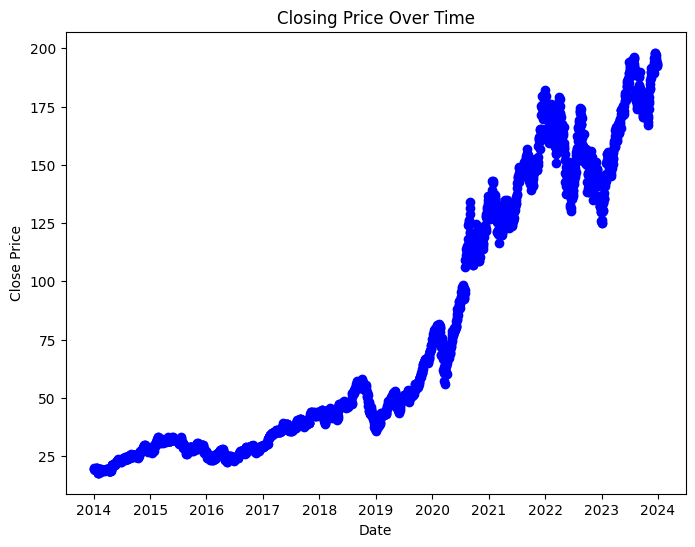

In [15]:
# Plot the closing price over time to visualize market movement
plt.figure(figsize=(8, 6))
plt.scatter(Df['date'], Df['close'], label='Close Price', color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.show()

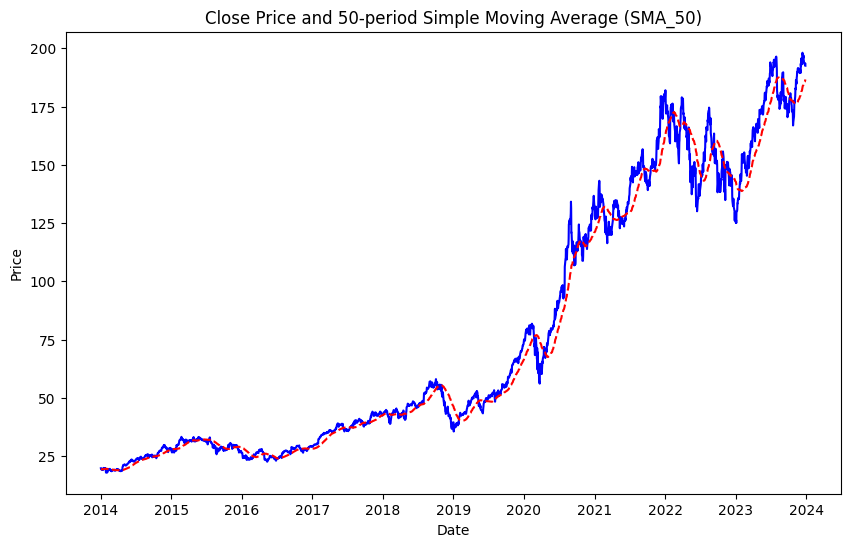

In [16]:
# Plot moving average (SMA_50) and closing price
plt.figure(figsize=(10, 6))
plt.plot(Df['date'], Df['close'], label='Close Price', color='blue')
plt.plot(Df['date'], Df['sma_50'], label='50-period SMA', color='red', linestyle='--')
plt.title('Close Price and 50-period Simple Moving Average (SMA_50)')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

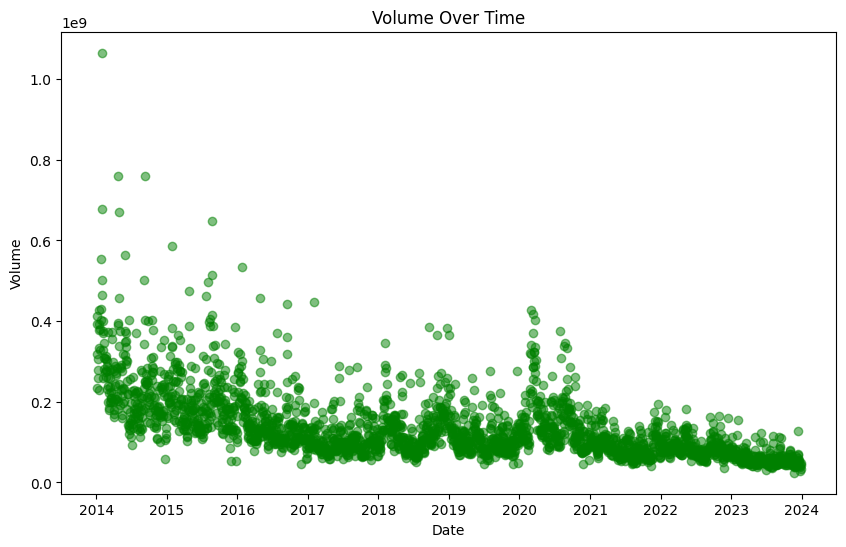

In [17]:
# Plot volume over time
plt.figure(figsize=(10, 6))
plt.scatter(Df['date'], Df['volume'], color='green', alpha=0.5)
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


#  🔤 What is One-Hot Encoding?
One-hot encoding is a technique used to convert categorical data (like colors, names, or labels) into a numerical format that machine learning models can understand

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
Days = np.array(["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday"])
TeaSales = np.array([120,230,250,123,129,130])

# Create a DataFrame
df = pd.DataFrame({
    "Day": Days,
    "Tea Sales": TeaSales
})

X = df["Day"]
y = df["Tea Sales"]

In [19]:
X

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
4       Friday
5     Saturday
Name: Day, dtype: object

In [20]:
y

0    120
1    230
2    250
3    123
4    129
5    130
Name: Tea Sales, dtype: int64

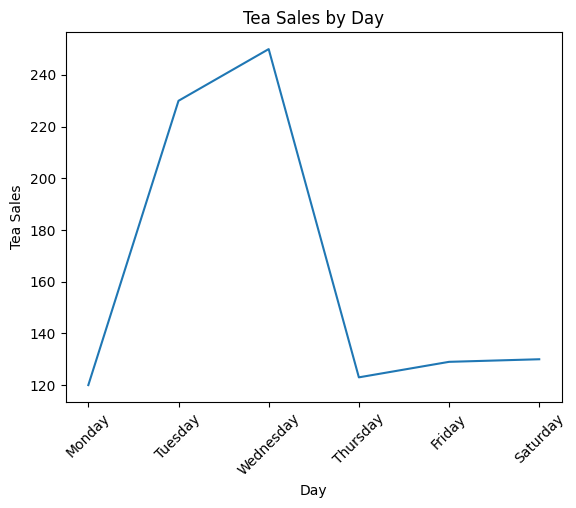

In [21]:
plt.plot(X, y)
plt.title("Tea Sales by Day")
plt.xlabel("Day")
plt.ylabel("Tea Sales")
plt.xticks(rotation=45)
plt.show()


In [22]:

from sklearn.preprocessing import OneHotEncoder


# Create a OneHotEncoder object
encoder = OneHotEncoder()

# Fit and transform the categorical feature
X_encoded = encoder.fit_transform(X.values.reshape(-1, 1)).toarray()

X_encoded

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_encoded, y)

# Make predictions
predictions = model.predict([[0., 0., 1., 0., 0., 0.]])
predictions

array([130.])

In [24]:
import joblib